In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from mpl_toolkits.mplot3d import Axes3D

In [21]:
cube = pd.read_csv("dane/cube.csv")
cube_x=cube["x"]
cube_y=cube["y"]
cube_z=cube["z"]
cube_c=cube["c"]

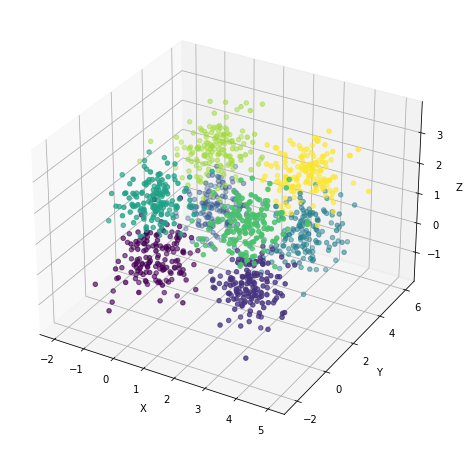

In [83]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.scatter(cube_x, cube_y, cube_z, c=cube_c)

In [14]:
hexagon = pd.read_csv("dane/hexagon.csv")

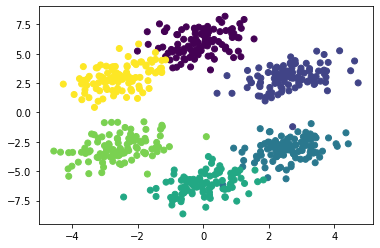

In [19]:
fig = plt.figure(figsize=(6,4))
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.scatter(hexagon["x"], hexagon["y"], c=hexagon["c"])

In [37]:
hex_x = hexagon[["x","y"]]
hex_x = np.array(hex_x)
hex_y = hexagon["y"]
hex_y = np.array(hex_y)

# implementacja - sieć Kohonena

In [119]:
import numpy as np

class KohonenNetwork:
    def __init__(self, input_dim, output_dim, learning_rate=0.1, epochs=100, neighborhood_function="gauss"):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.rand(output_dim[0], output_dim[1], input_dim)
        self.cluster_labels = self.assign_cluster_labels()
        if neighborhood_function=="gauss": self.N_F = self.gaussian_function
        if neighborhood_function=="gauss_2der": self.N_F = self.derivative2_gaussian

    def gaussian_function(self, winner, neuron, t):
        distance = np.sqrt((winner[0] - neuron[0])**2 + (winner[1] - neuron[1])**2)
        return np.exp(-(distance*t)**2)
    
    def derivative2_gaussian(self, winner, neuron, t):
        distance = np.sqrt((winner[0] - neuron[0])**2 + (winner[1] - neuron[1])**2)
        return -np.exp(-(distance * t)**2) * (4 * (distance**2) * (t**2) - 2)

    def alfa(self, t):
        return self.learning_rate * np.exp(-t/(self.epochs+1))

    def train(self, input_data):
        for t in range(1, self.epochs+1):
            for x in input_data:
                winner_index = self.find_winner(x)
                for i in range(self.output_dim[0]):
                    for j in range(self.output_dim[1]):
                        influence = self.N_F(winner_index, (i, j), t)
                        self.weights[i, j] += influence * self.alfa(t) * (x - self.weights[i, j])

    def find_winner(self, x):
        distances = np.sum((self.weights - x)**2, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)
    
    def assign_cluster_labels(self):
        num_clusters = np.prod(self.output_dim)
        return np.arange(num_clusters)

    def predict(self, input_data):
        predictions = []
        for x in input_data:
            winner_index = self.find_winner(x)
            cluster_label = self.cluster_labels[winner_index[0] * self.output_dim[1] + winner_index[1]]
            predictions.append(cluster_label)
        return predictions


# 1 - zbiór hexagon

In [81]:
# Przykładowe dane
input_data = hex_x

# Inicjalizacja i trening sieci Kohonena
kohonen_network = KohonenNetwork(input_dim=2, output_dim=(2, 3), learning_rate=0.1, epochs=100, neighborhood_function="gauss")
kohonen_network.train(input_data)

predictions = kohonen_network.predict(hex_x)
print("Predictions:", predictions)

Predictions: [4, 3, 5, 4, 5, 5, 4, 4, 1, 3, 1, 4, 3, 5, 2, 2, 4, 3, 0, 3, 5, 0, 4, 2, 2, 0, 1, 3, 4, 3, 0, 0, 1, 5, 5, 4, 4, 1, 5, 0, 0, 5, 5, 2, 2, 4, 4, 0, 0, 2, 2, 1, 0, 3, 0, 1, 3, 3, 3, 4, 5, 5, 1, 0, 3, 0, 5, 1, 5, 5, 1, 5, 5, 3, 5, 5, 3, 3, 3, 4, 0, 1, 1, 1, 2, 5, 0, 4, 5, 1, 2, 2, 1, 0, 0, 2, 4, 1, 2, 1, 0, 2, 5, 5, 4, 0, 4, 5, 5, 4, 3, 0, 2, 4, 2, 5, 4, 1, 3, 2, 4, 2, 1, 0, 0, 3, 4, 1, 4, 3, 3, 0, 1, 0, 3, 2, 4, 4, 0, 5, 2, 0, 3, 2, 4, 5, 2, 3, 0, 3, 3, 5, 2, 1, 0, 5, 1, 2, 2, 3, 4, 2, 2, 2, 3, 3, 0, 4, 0, 2, 1, 3, 2, 4, 1, 3, 2, 0, 4, 0, 0, 4, 1, 5, 4, 5, 5, 0, 0, 4, 0, 3, 3, 1, 0, 1, 5, 0, 2, 3, 5, 0, 0, 4, 3, 5, 2, 3, 1, 2, 4, 3, 2, 1, 1, 5, 4, 0, 3, 3, 0, 4, 5, 0, 4, 2, 4, 4, 2, 2, 4, 3, 2, 2, 4, 5, 5, 1, 3, 1, 0, 1, 4, 4, 1, 5, 3, 2, 5, 2, 5, 5, 2, 4, 2, 4, 2, 4, 2, 2, 3, 3, 5, 3, 1, 5, 0, 1, 5, 1, 3, 3, 2, 0, 5, 4, 1, 3, 1, 4, 3, 0, 5, 1, 5, 2, 4, 2, 3, 2, 1, 3, 5, 5, 3, 2, 1, 3, 1, 0, 2, 4, 5, 1, 2, 0, 3, 3, 1, 3, 5, 0, 1, 1, 4, 5, 4, 3, 2, 2, 3, 3, 5, 5, 2, 1, 2, 2, 3,

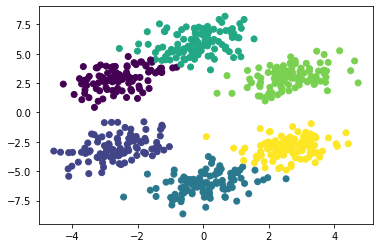

In [82]:
fig = plt.figure(figsize=(6,4))
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.scatter(hexagon["x"], hexagon["y"], c=predictions)

# 2 - zbiór cube

In [90]:
cube_x=np.array(cube[["x","y","z"]])

In [107]:
# Przykładowe dane
input_data = cube_x

# Inicjalizacja i trening sieci Kohonena
kohonen_network = KohonenNetwork(input_dim=3, output_dim=(3, 3), learning_rate=0.01, epochs=1000, neighborhood_function="gauss")
kohonen_network.train(input_data)

predictions = kohonen_network.predict(cube_x)
print("Predictions:", predictions)

Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

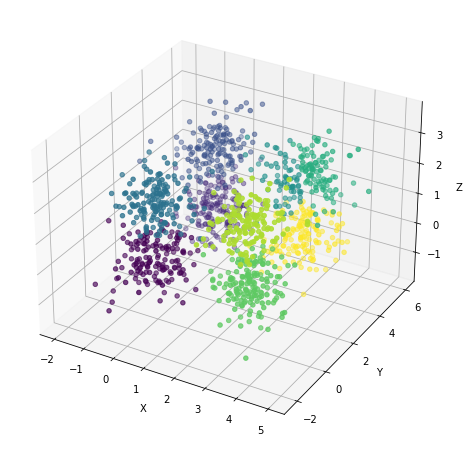

In [108]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.scatter(cube["x"], cube_y, cube_z, c=predictions)

# 2 derivative function

Cube

In [137]:
# Przykładowe dane
input_data = cube_x

# Inicjalizacja i trening sieci Kohonena
kohonen_network = KohonenNetwork(input_dim=3, output_dim=(3, 3), learning_rate=0.001, epochs=1000, neighborhood_function="gauss_2der")
kohonen_network.train(input_data)

predictions = kohonen_network.predict(cube_x)
print("Predictions:", predictions)

Predictions: [6, 0, 0, 6, 0, 0, 6, 8, 0, 2, 6, 0, 0, 6, 0, 0, 0, 0, 8, 0, 0, 8, 8, 0, 8, 6, 0, 8, 6, 0, 6, 6, 8, 6, 6, 0, 8, 0, 0, 6, 8, 6, 0, 6, 0, 6, 6, 0, 0, 6, 8, 8, 6, 5, 6, 0, 6, 6, 0, 6, 6, 8, 8, 6, 0, 6, 8, 8, 6, 8, 0, 8, 6, 8, 0, 6, 0, 8, 8, 8, 0, 6, 0, 6, 0, 0, 6, 8, 2, 0, 6, 0, 8, 6, 6, 6, 0, 8, 8, 8, 6, 8, 0, 0, 0, 6, 0, 6, 0, 0, 0, 6, 6, 6, 8, 0, 0, 8, 0, 6, 8, 8, 6, 6, 0, 8, 8, 0, 0, 0, 6, 0, 0, 6, 0, 8, 6, 0, 8, 6, 5, 8, 0, 8, 0, 0, 6, 5, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 6, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

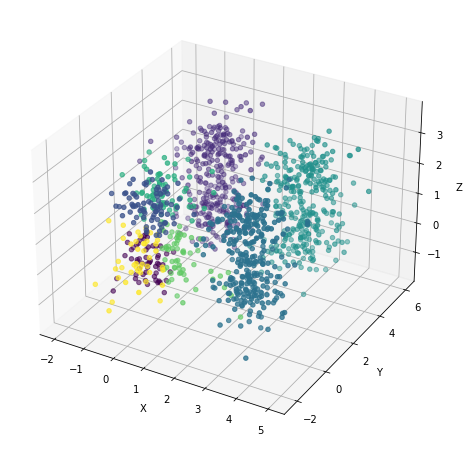

In [138]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.scatter(cube["x"], cube_y, cube_z, c=predictions)

Hexagon

In [133]:
# Przykładowe dane
input_data = hex_x

# Inicjalizacja i trening sieci Kohonena
kohonen_network = KohonenNetwork(input_dim=2, output_dim=(2, 3), learning_rate=0.001, epochs=100, neighborhood_function="gauss_2der")
kohonen_network.train(input_data)

predictions = kohonen_network.predict(hex_x)
print("Predictions:", predictions)

Predictions: [0, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 0, 1, 3, 4, 4, 0, 1, 5, 1, 3, 5, 0, 4, 4, 5, 2, 1, 0, 1, 5, 5, 2, 3, 3, 0, 0, 2, 3, 5, 5, 3, 3, 4, 4, 0, 0, 5, 5, 4, 4, 2, 5, 1, 5, 2, 1, 1, 1, 0, 3, 3, 2, 5, 1, 5, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 1, 1, 1, 0, 5, 2, 2, 2, 4, 3, 5, 0, 3, 2, 4, 4, 2, 5, 5, 4, 0, 2, 4, 2, 5, 4, 3, 3, 0, 5, 0, 3, 3, 0, 1, 5, 4, 0, 4, 3, 0, 2, 1, 4, 0, 4, 2, 5, 5, 1, 0, 2, 0, 1, 1, 5, 2, 5, 1, 4, 0, 0, 5, 3, 4, 5, 1, 4, 0, 3, 4, 1, 5, 1, 1, 3, 4, 2, 5, 3, 2, 4, 4, 1, 0, 4, 4, 4, 1, 1, 5, 0, 5, 4, 2, 1, 4, 0, 2, 1, 4, 5, 0, 5, 5, 0, 2, 3, 0, 3, 3, 5, 5, 0, 5, 1, 1, 2, 5, 2, 3, 5, 4, 1, 3, 5, 5, 0, 1, 3, 4, 1, 2, 4, 0, 1, 4, 2, 2, 3, 0, 5, 1, 1, 5, 0, 3, 5, 0, 4, 0, 0, 4, 4, 0, 1, 4, 4, 0, 3, 3, 2, 1, 2, 5, 2, 0, 0, 2, 3, 1, 4, 3, 4, 3, 3, 4, 0, 4, 0, 4, 0, 4, 4, 1, 1, 3, 1, 2, 3, 5, 2, 3, 2, 1, 1, 4, 5, 3, 0, 2, 1, 2, 0, 1, 5, 3, 2, 3, 4, 0, 4, 1, 4, 2, 1, 3, 3, 1, 4, 2, 1, 2, 5, 4, 0, 3, 2, 4, 5, 1, 1, 2, 1, 3, 5, 2, 2, 0, 3, 0, 1, 4, 4, 1, 1, 3, 3, 4, 2, 4, 4, 1,

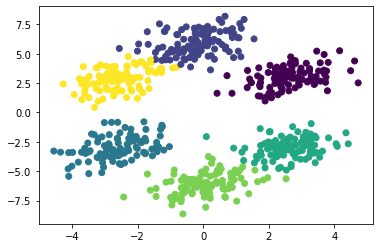

In [134]:
fig = plt.figure(figsize=(6,4))
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.scatter(hexagon["x"], hexagon["y"], c=predictions)